# Q3.3: CIFAR-10 CNN - Data Augmentation Comparison

Train a CNN on CIFAR-10 **with vs without** data augmentation and compare generalization.

**Exam outputs:** training/validation curves, test accuracy comparison, and brief overfitting analysis (train–val gap).

## Step 1: Import Libraries and Load Data

In [ ]:
# Install tensorflow if not already installed (this line should be executed first)
try:
    import tensorflow
except ImportError:
    print("TensorFlow not found. Installing now...")
    !pip install tensorflow
    print("TensorFlow installed. Please restart the runtime to ensure all imports work correctly.")

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Image shape: {X_train.shape[1:]}")

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']
print(f"Classes: {class_names}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 417s 2us/step
Training samples: 50000
Test samples: 10000
Image shape: (32, 32, 3)
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


## Step 2: Visualize Sample Images

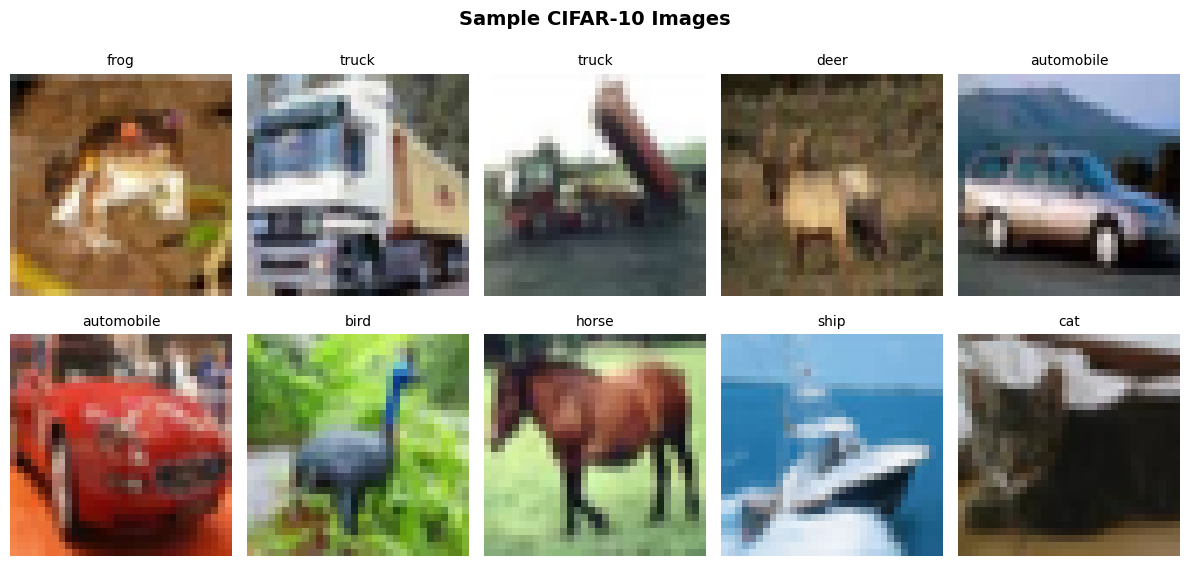

In [2]:
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]], fontsize=10)
    plt.axis('off')
plt.suptitle('Sample CIFAR-10 Images', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Step 3: Define CNN Model

In [3]:
def build_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Dropout(0.2),
        
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Dropout(0.3),
        
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.4),
        
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

print("CNN architecture defined")

CNN architecture defined


## Step 4: Train WITHOUT Data Augmentation (Baseline)

In [4]:
print("Training WITHOUT data augmentation...")

model_no_aug = build_cnn()
model_no_aug.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

history_no_aug = model_no_aug.fit(X_train, y_train_cat,
                                   batch_size=128,
                                   epochs=20,
                                   validation_split=0.2,
                                   verbose=1)

loss_no_aug, acc_no_aug = model_no_aug.evaluate(X_test, y_test_cat, verbose=0)
print(f"\nTest Accuracy (No Augmentation): {acc_no_aug*100:.2f}%")

Training WITHOUT data augmentation...


b:\MLPracs\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 132ms/step - accuracy: 0.2671 - loss: 2.0054 - val_accuracy: 0.1012 - val_loss: 4.4592
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 127ms/step - accuracy: 0.3954 - loss: 1.6135 - val_accuracy: 0.4970 - val_loss: 1.4228
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 126ms/step - accuracy: 0.4901 - loss: 1.3957 - val_accuracy: 0.5755 - val_loss: 1.1868
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 143ms/step - accuracy: 0.5472 - loss: 1.2538 - val_accuracy: 0.5820 - val_loss: 1.2474
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 132ms/step - accuracy: 0.5964 - loss: 1.1432 - val_accuracy: 0.5120 - val_loss: 1.4866
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 127ms/step - accuracy: 0.6261 - loss: 1.0659 - val_accuracy: 0.6610 - val_loss: 0.9667
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 49s 156ms/step - accuracy: 0.6558 - loss: 0.9910 - val_accuracy: 0.7081 - val_loss: 0.8416
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 139ms/step - accuracy: 0.6769 - loss: 0

## Step 5: Setup Data Augmentation

In [5]:
# Define augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

# Fit on training data
datagen.fit(X_train)

print("Data augmentation configured:")
print("- Rotation: ±15°")
print("- Width/Height shift: 10%")
print("- Horizontal flip: Yes")
print("- Zoom: ±10%")

Data augmentation configured:
- Rotation: ±15°
- Width/Height shift: 10%
- Horizontal flip: Yes
- Zoom: ±10%


### Visualize Augmented Images

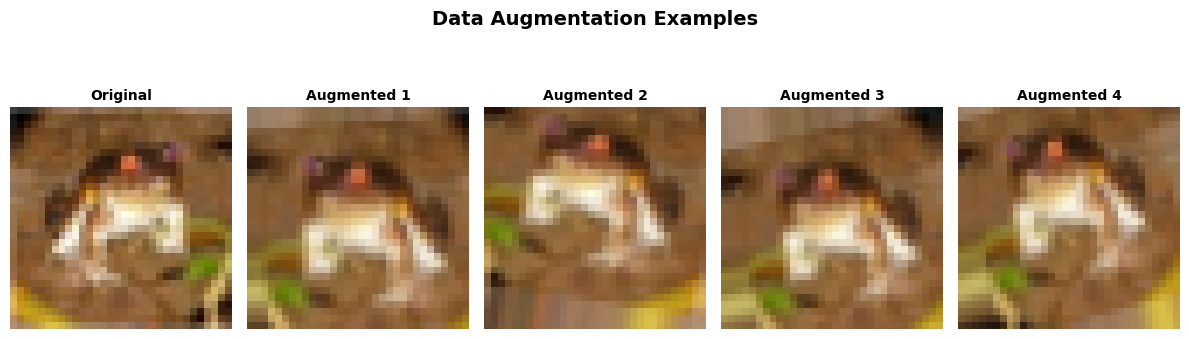

In [6]:
# Show augmented versions of one image
sample_img = X_train[0].reshape((1, 32, 32, 3))

plt.figure(figsize=(12, 4))
plt.subplot(1, 5, 1)
plt.imshow(X_train[0])
plt.title('Original', fontsize=10, fontweight='bold')
plt.axis('off')

aug_iter = datagen.flow(sample_img, batch_size=1)
for i in range(4):
    aug_img = next(aug_iter)[0]
    plt.subplot(1, 5, i+2)
    plt.imshow(aug_img)
    plt.title(f'Augmented {i+1}', fontsize=10, fontweight='bold')
    plt.axis('off')

plt.suptitle('Data Augmentation Examples', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Step 6: Train WITH Data Augmentation

In [7]:
print("Training WITH data augmentation...")

model_aug = build_cnn()
model_aug.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Use validation split manually
val_split = int(0.8 * len(X_train))
X_train_split = X_train[:val_split]
y_train_split = y_train_cat[:val_split]
X_val = X_train[val_split:]
y_val = y_train_cat[val_split:]

history_aug = model_aug.fit(
    datagen.flow(X_train_split, y_train_split, batch_size=128),
    epochs=20,
    validation_data=(X_val, y_val),
    steps_per_epoch=len(X_train_split) // 128,
    verbose=1
)

loss_aug, acc_aug = model_aug.evaluate(X_test, y_test_cat, verbose=0)
print(f"\nTest Accuracy (With Augmentation): {acc_aug*100:.2f}%")

Training WITH data augmentation...
Epoch 1/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 50s 152ms/step - accuracy: 0.2292 - loss: 2.0843 - val_accuracy: 0.2112 - val_loss: 3.2371
Epoch 2/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 47s 153ms/step - accuracy: 0.3047 - loss: 1.8150

b:\MLPracs\.venv\lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3047 - loss: 1.8150 - val_accuracy: 0.2029 - val_loss: 3.3239
Epoch 3/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 50s 160ms/step - accuracy: 0.3581 - loss: 1.7295 - val_accuracy: 0.4484 - val_loss: 1.5303
Epoch 4/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3594 - loss: 1.7194 - val_accuracy: 0.4459 - val_loss: 1.5435
Epoch 5/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 50s 161ms/step - accuracy: 0.4187 - loss: 1.5748 - val_accuracy: 0.4595 - val_loss: 1.5455
Epoch 6/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4453 - loss: 1.5111 - val_accuracy: 0.4726 - val_loss: 1.4861
Epoch 7/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 59s 188ms/step - accuracy: 0.4720 - loss: 1.4464 - val_accuracy: 0.3476 - val_loss: 2.5349
Epoch 8/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4844 - loss: 1.5317 - val_accuracy: 0.2979 - val_loss: 3.0022
Epoch 9/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 46s 146ms/step - accuracy: 0.5209 - loss: 1.3296 - val_accuracy: 

## Step 7: Compare Results

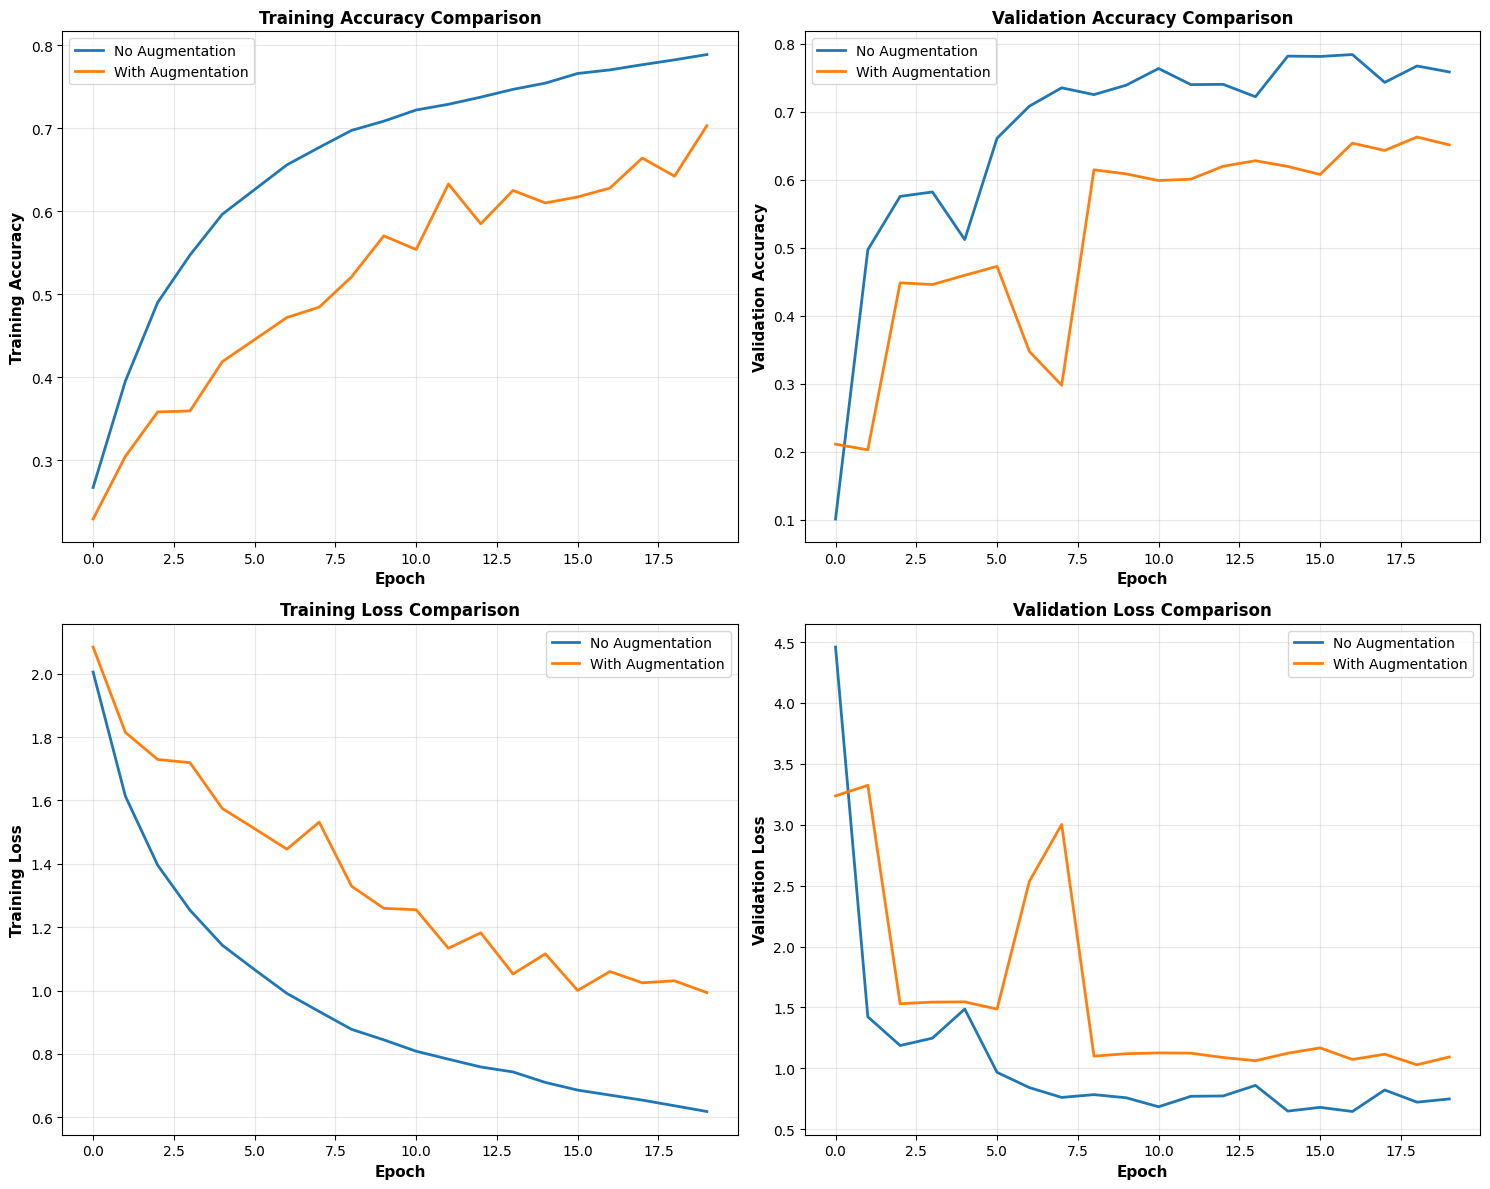

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Training accuracy
ax1.plot(history_no_aug.history['accuracy'], label='No Augmentation', linewidth=2)
ax1.plot(history_aug.history['accuracy'], label='With Augmentation', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=11, fontweight='bold')
ax1.set_ylabel('Training Accuracy', fontsize=11, fontweight='bold')
ax1.set_title('Training Accuracy Comparison', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Validation accuracy
ax2.plot(history_no_aug.history['val_accuracy'], label='No Augmentation', linewidth=2)
ax2.plot(history_aug.history['val_accuracy'], label='With Augmentation', linewidth=2)
ax2.set_xlabel('Epoch', fontsize=11, fontweight='bold')
ax2.set_ylabel('Validation Accuracy', fontsize=11, fontweight='bold')
ax2.set_title('Validation Accuracy Comparison', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

# Training loss
ax3.plot(history_no_aug.history['loss'], label='No Augmentation', linewidth=2)
ax3.plot(history_aug.history['loss'], label='With Augmentation', linewidth=2)
ax3.set_xlabel('Epoch', fontsize=11, fontweight='bold')
ax3.set_ylabel('Training Loss', fontsize=11, fontweight='bold')
ax3.set_title('Training Loss Comparison', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)

# Validation loss
ax4.plot(history_no_aug.history['val_loss'], label='No Augmentation', linewidth=2)
ax4.plot(history_aug.history['val_loss'], label='With Augmentation', linewidth=2)
ax4.set_xlabel('Epoch', fontsize=11, fontweight='bold')
ax4.set_ylabel('Validation Loss', fontsize=11, fontweight='bold')
ax4.set_title('Validation Loss Comparison', fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Step 8: Test Accuracy Bar Chart

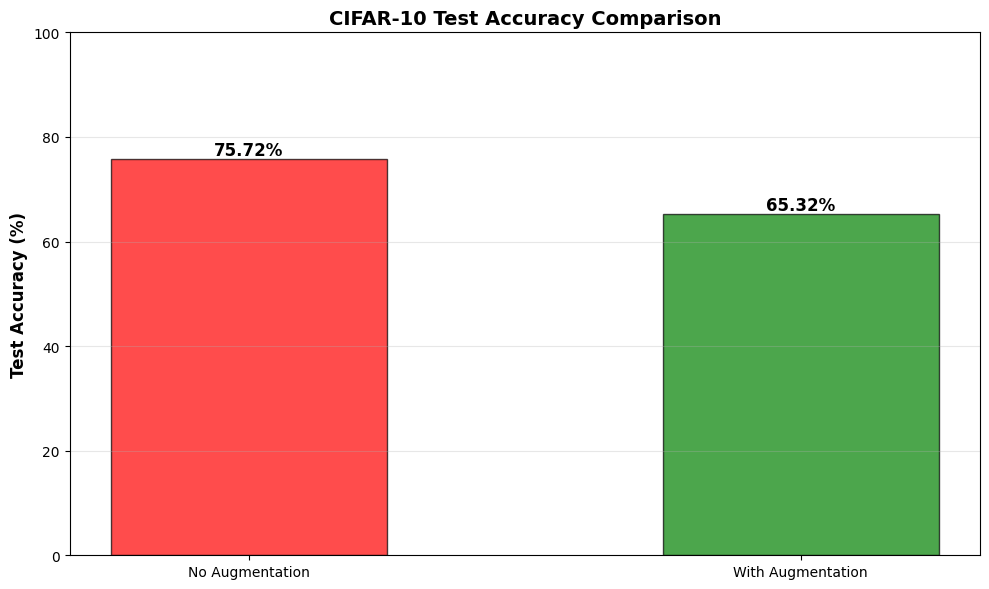


Accuracy Improvement: -10.40%


In [9]:
plt.figure(figsize=(10, 6))
models = ['No Augmentation', 'With Augmentation']
accuracies = [acc_no_aug * 100, acc_aug * 100]
colors = ['red', 'green']

bars = plt.bar(models, accuracies, color=colors, alpha=0.7, edgecolor='black', width=0.5)
plt.ylabel('Test Accuracy (%)', fontsize=12, fontweight='bold')
plt.title('CIFAR-10 Test Accuracy Comparison', fontsize=14, fontweight='bold')
plt.ylim([0, 100])

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

improvement = acc_aug - acc_no_aug
print(f"\nAccuracy Improvement: {improvement*100:.2f}%")

## Step 9: Overfitting Analysis

In [10]:
# Calculate train-val gap
final_train_no_aug = history_no_aug.history['accuracy'][-1]
final_val_no_aug = history_no_aug.history['val_accuracy'][-1]
gap_no_aug = final_train_no_aug - final_val_no_aug

final_train_aug = history_aug.history['accuracy'][-1]
final_val_aug = history_aug.history['val_accuracy'][-1]
gap_aug = final_train_aug - final_val_aug

print("\n=== OVERFITTING ANALYSIS ===")
print(f"\nNo Augmentation:")
print(f"  Final Train Accuracy: {final_train_no_aug*100:.2f}%")
print(f"  Final Val Accuracy: {final_val_no_aug*100:.2f}%")
print(f"  Overfitting Gap: {gap_no_aug*100:.2f}%")

print(f"\nWith Augmentation:")
print(f"  Final Train Accuracy: {final_train_aug*100:.2f}%")
print(f"  Final Val Accuracy: {final_val_aug*100:.2f}%")
print(f"  Overfitting Gap: {gap_aug*100:.2f}%")

print(f"\nGap Reduction: {(gap_no_aug - gap_aug)*100:.2f}%")
print("✓ Data augmentation reduces overfitting!" if gap_aug < gap_no_aug else "⨯ No improvement")


=== OVERFITTING ANALYSIS ===

No Augmentation:
  Final Train Accuracy: 78.88%
  Final Val Accuracy: 75.84%
  Overfitting Gap: 3.04%

With Augmentation:
  Final Train Accuracy: 70.31%
  Final Val Accuracy: 65.12%
  Overfitting Gap: 5.19%

Gap Reduction: -2.15%
⨯ No improvement


## Summary

**Data Augmentation Benefits:**
1. **Reduces Overfitting**: Creates more diverse training samples
2. **Better Generalization**: Model learns invariance to transformations
3. **Effective Dataset Expansion**: No additional labeling required

**Common Augmentation Techniques:**
- **Rotation**: ±15° typically safe for most images
- **Translation**: Shift width/height by 10-20%
- **Horizontal Flip**: For symmetric objects (not text/digits)
- **Zoom**: ±10-20% scale variation
- **Brightness/Contrast**: Lighting variations

**Trade-offs:**
- Slower training (more computation per batch)
- May hurt performance if transformations break semantic meaning
- Domain-specific: digits shouldn't flip, faces have orientation